In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import libraries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
np.random.seed(7)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

Shape of training data: 
(25000,)
(25000,)
Shape of test data: 
(25000,)
(25000,)


In [6]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [7]:
# create the model
epochs = 10

embedding_vecor_length = 16
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 121ms/step - accuracy: 0.6169 - loss: 0.6384 - val_accuracy: 0.8091 - val_loss: 0.4261
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 182ms/step - accuracy: 0.8469 - loss: 0.3708 - val_accuracy: 0.7103 - val_loss: 0.7707
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.8753 - loss: 0.3151 - val_accuracy: 0.8692 - val_loss: 0.3097
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.8816 - loss: 0.2915 - val_accuracy: 0.8734 - val_loss: 0.3024
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.9032 - loss: 0.2582 - val_accuracy: 0.8766 - val_loss: 0.2944
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.9057 - loss: 0.2421 - val_accuracy: 0.8769 - val_loss: 0.3066
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.9139 - loss: 0.2236 - val_accuracy: 0.8838 - val_loss: 0.2926
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.9148 - loss: 0.22

In [9]:
#evaluate the model
test =  model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (test[1]*100))

Testing Accuracy: 85.86%


In [10]:
def plot_result(history, epoch):

    epoch_range = range(1, epoch+1)

    plt.plot(epoch_range, history.history['accuracy'], label='Training acc')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend(loc='upper left')
    plt.savefig('acc.jpg')

    plt.show()

    plt.plot(epoch_range, history.history['loss'], label='Training loss')
    plt.plot(epoch_range, history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper left')
    plt.savefig('loss.jpg')

    plt.show()

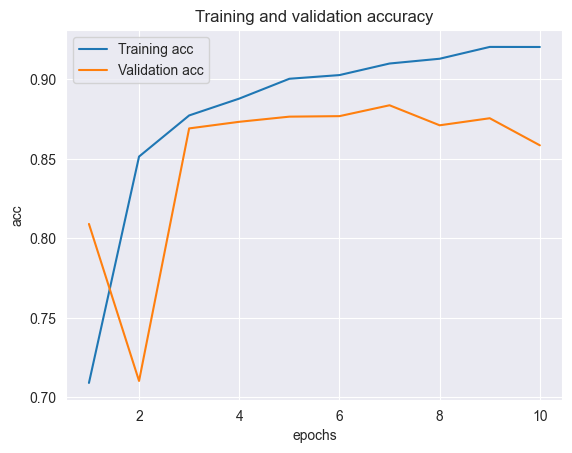

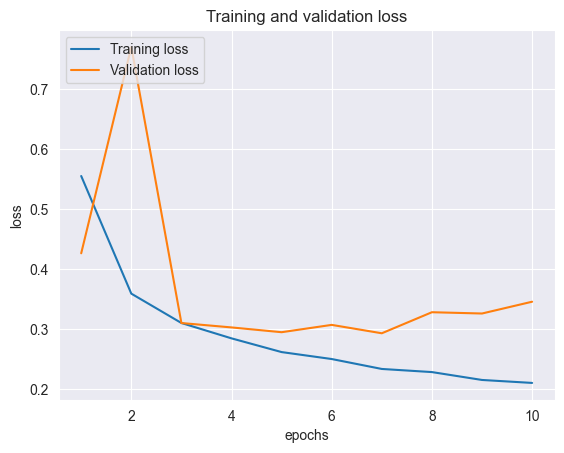

In [11]:
plot_result(history, epochs)